In [23]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the correct file path with the file extension '.csv'

# Read the CSV file
df = pd.read_csv('Airline dataset/aircraft_data.csv')

# Display the first few rows of the DataFrame
print(df.head())


   Passenger ID First Name Last Name  Gender   Age Nationality  \
0       10856.0     Edithe    Leggis  Female  62.0       Japan   
1       43872.0     Elwood      Catt    Male  62.0   Nicaragua   
2       42633.0      Darby   Felgate    Male  67.0      Russia   
3       78493.0   Dominica      Pyle  Female  71.0       China   
4       82072.0        Bay   Pencost    Male  21.0       China   

                Airport Name Airport Country Code   Country Name  \
0           Coldfoot Airport                   US  United States   
1          Kugluktuk Airport                   CA         Canada   
2     Grenoble-Isère Airport                   FR         France   
3  Ottawa / Gatineau Airport                   CA         Canada   
4            Gillespie Field                   US  United States   

  Airport Continent     Continents Departure Date Arrival Airport  \
0               NAM  North America      6/28/2022             CXF   
1               NAM  North America     12/26/2022       

C:\Users\USER\AppData\Local\Temp\ipykernel_4064\19017943.py:9: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airline dataset/aircraft_data.csv')


In [3]:
conn = mysql.connector.connect(host='localhost',user='root',password='afnan@007',database='airline')
if conn :
    print('successfully connected')
else:
    print('error')

successfully connected


In [6]:
df = pd.read_sql_query('select * from aircraft_data',conn)
print(df)

     Passenger ID First Name  Last Name  Gender  Age  Nationality  \
0           10856     Edithe     Leggis  Female   62        Japan   
1           43872     Elwood       Catt    Male   62    Nicaragua   
2           42633      Darby    Felgate    Male   67       Russia   
3           78493   Dominica       Pyle  Female   71        China   
4           82072        Bay    Pencost    Male   21        China   
..            ...        ...        ...     ...  ...          ...   
123         60038    Leandra      Demer  Female    6     Colombia   
124         61283     Shermy   Gatchell    Male   66     Colombia   
125         13487       Bryn    Pratley  Female   56     Maldives   
126         47082       Eran  Summerill  Female   62  Afghanistan   
127         17122     Arlena    Ridwood  Female   65      Ireland   

                  Airport Name Airport Country Code        Country Name  \
0             Coldfoot Airport                   US       United States   
1            Kugluktu

C:\Users\USER\AppData\Local\Temp\ipykernel_4064\3587411924.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('select * from aircraft_data',conn)


In [7]:
#summary statistics
summary_stats =df.describe()
print("Summary Status :")
print(summary_stats)

Summary Status :
       Passenger ID         Age
count    128.000000  128.000000
mean   52089.953125   46.656250
std    27520.576173   24.953323
min    10856.000000    2.000000
25%    27506.500000   23.750000
50%    46848.500000   50.500000
75%    76935.000000   67.250000
max    99708.000000   89.000000


In [10]:
#Gender distribution
gender_distribution = df['Gender'].value_counts()
print("Gender distribution :")
print(gender_distribution)

Gender distribution :
Gender
Female    66
Male      62
Name: count, dtype: int64


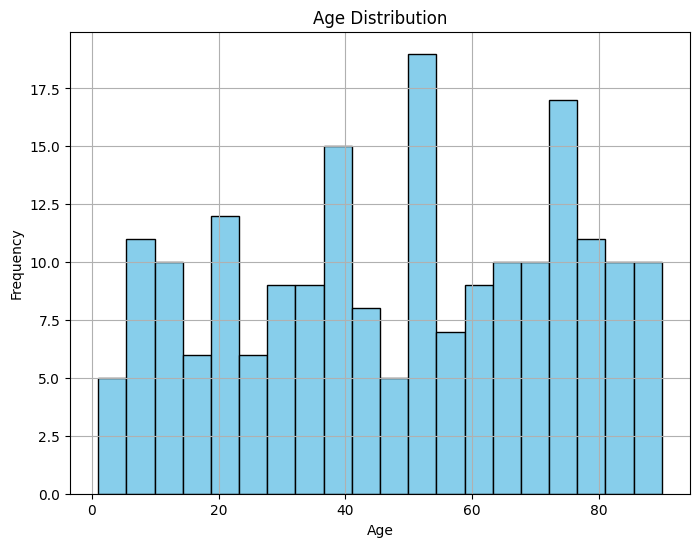

In [16]:
#Age distribution
plt.figure(figsize=(8,6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [18]:
# 4. Flight status distribution
flight_status_distribution = df['Flight Status'].value_counts()
print("\nFlight Status Distribution:")
print(flight_status_distribution)


Flight Status Distribution:
Flight Status
On Time      70
Cancelled    69
Delayed      60
Name: count, dtype: int64


In [20]:
# 5. Nationality distribution
top_nationalities = df['Nationality'].value_counts().head(10)
print("\nTop 10 Nationalities:")
print(top_nationalities)


Top 10 Nationalities:
Nationality
China          31
Indonesia      19
Russia         16
Brazil         11
Philippines     9
Ukraine         8
Sweden          8
Peru            7
Poland          5
Portugal        4
Name: count, dtype: int64


In [22]:
# 6. Analysis based on departure continent
departure_continent_distribution = df['Airport Continent'].value_counts()
print("\nDeparture Continent Distribution:")
print(departure_continent_distribution)


Departure Continent Distribution:
Airport Continent
NAM    71
AS     38
OC     35
EU     19
AF     19
SAM    17
Name: count, dtype: int64


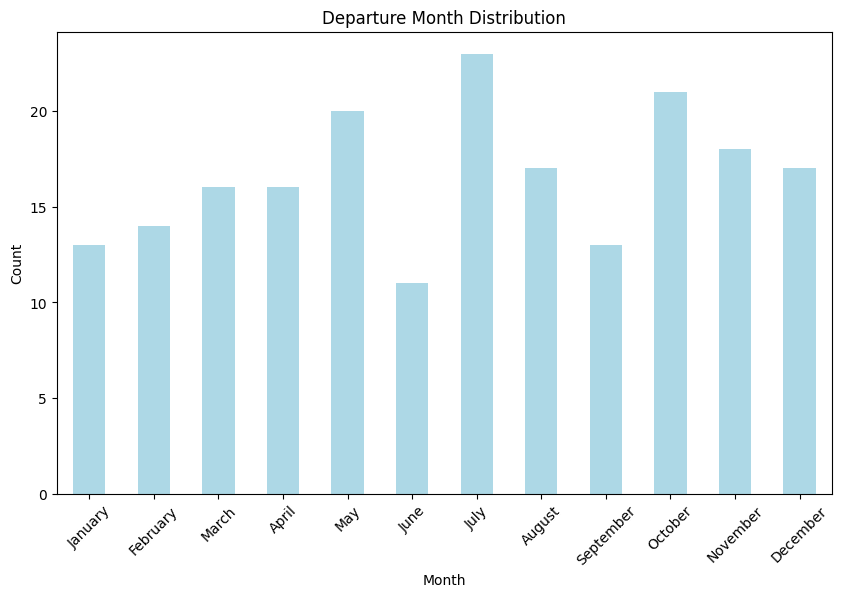

In [29]:
# Distribution of departure months (Bar chart)
df['Departure Date'] = pd.to_datetime(df['Departure Date'])
df['Departure Month'] = df['Departure Date'].dt.month
departure_month_distribution = df['Departure Month'].value_counts().sort_index()
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(10, 6))
departure_month_distribution.plot(kind='bar', color='lightblue')
plt.title('Departure Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(12), month_names, rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

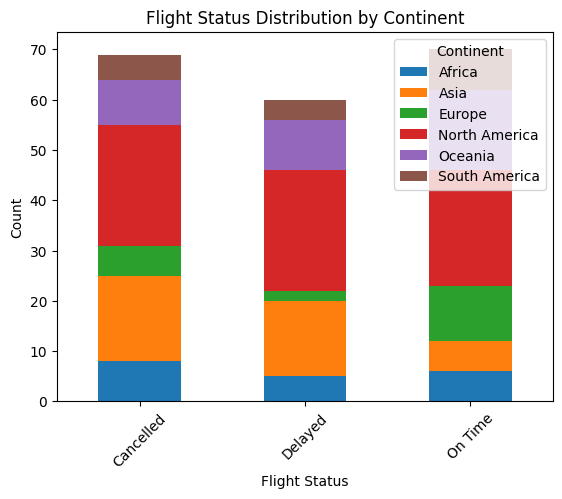

In [32]:
# Distribution of flight status by continent (Stacked bar chart)
flight_status_continent = pd.crosstab(df['Flight Status'], df['Continents'])
plt.figure(figsize=(10, 6))
flight_status_continent.plot(kind='bar', stacked=True)
plt.title('Flight Status Distribution by Continent')
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Continent')
plt.show()